# $$\textbf{TOV equations}$$

## Different resolutions, fixed pressure

I am going to solve the TOV equations using the Einstein Toolkit, varying the resolution and see what happens by plotting them and comparing the outcomes.

### Data import 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import kuibit.cactus_scalars as cs
import kuibit.simdir as sd
from kuibit import grid_data as gd
import matplotlib.ticker as mtick

%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
sim = sd.SimDir("./TOV_example/")
sim_1 = sd.SimDir("./TOV_example_1/")
sim_2 = sd.SimDir("./TOV_example_1_5/")

In [3]:
timeseries = sim.timeseries
timeseries_1 = sim_1.timeseries
timeseries_2 = sim_2.timeseries
#print(timeseries)

In [4]:
rho_max=timeseries.maximum.fields.rho
rho_max_1=timeseries_1.maximum.fields.rho
rho_max_2=timeseries_2.maximum.fields.rho

### Plots

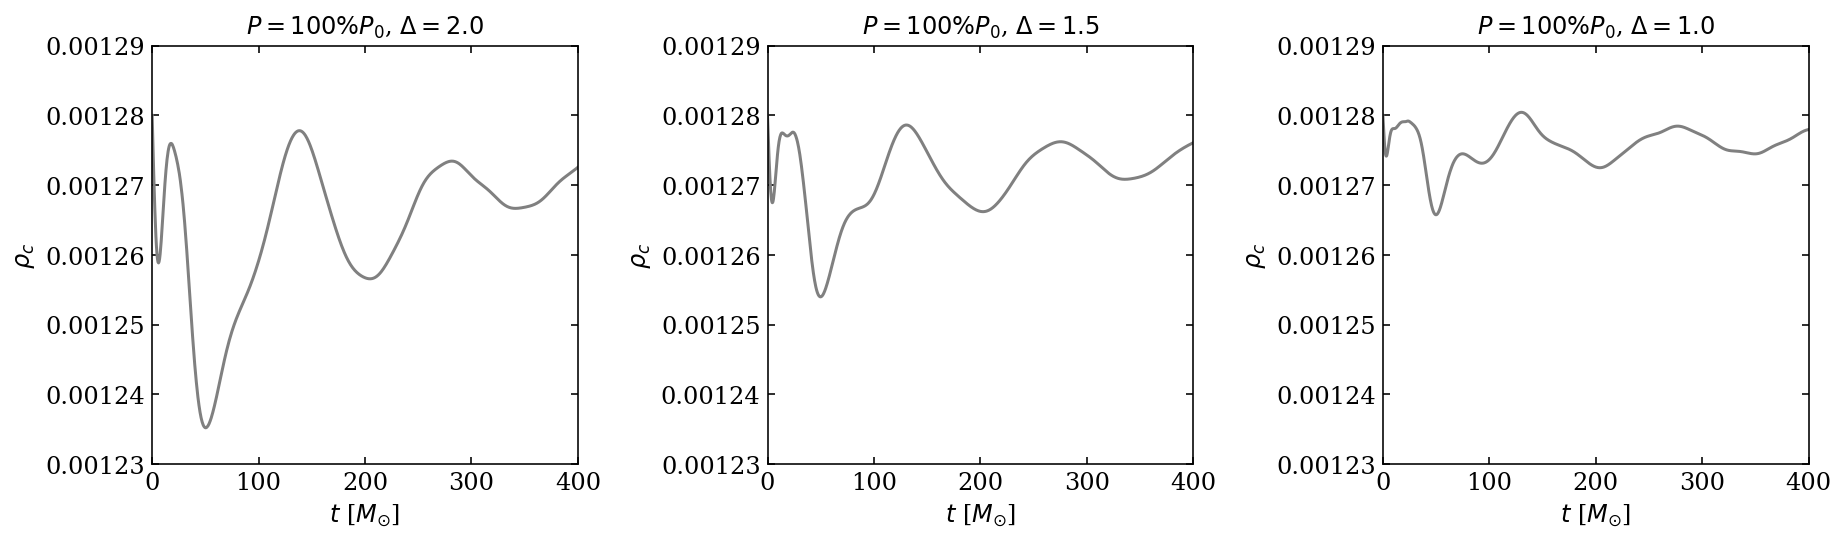

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

ax1.plot(rho_max, c='grey')
#ax1.set_title("maximum rest-mass density")
ax1.set_xlabel(r'$t$ [$M_{\odot}$]')
ax1.set_ylabel(r'$\rho_c$')
ax1.set_title(r'$P = 100\% P_0$, $\Delta = 2.0$')
ax1.set_ylim(0.00123, 0.00129)

ax3.plot(rho_max_1, c='grey')
#a3.set_title("maximum rest-mass density")
ax3.set_xlabel(r'$t$ [$M_{\odot}$]')
ax3.set_ylabel(r'$\rho_c$')
ax3.set_title(r'$P = 100\% P_0$, $\Delta = 1.0$')
ax3.set_ylim(0.00123, 0.00129)

ax2.plot(rho_max_2, c='grey')
#a2.set_title("maximum rest-mass density")
ax2.set_xlabel(r'$t$ [$M_{\odot}$]')
ax2.set_ylabel(r'$\rho_c$')
ax2.set_title(r'$P = 100\% P_0$, $\Delta = 1.5$')
ax2.set_ylim(0.00123, 0.00129)

plt.tight_layout()
plt.savefig("./images/md_res.png")
plt.show()

### 2D grid evolution

Making use of the spherical symmetry I will plot the 2D histogram representing the positive $x$ and $y$ axis. The neutro star will be placed with its center in (0, 0); I finally will plot the effect of $\textbf{numerical}$ oscillations on the evolution in time.

In [13]:
gf = sim.gf
gf_1 = sim_1.gf
gf_2 = sim_2.gf
#print(gf)

In [14]:
vars2D = gf.xy
vars2D_1 = gf_1.xy
vars2D_2 = gf_2.xy

#print(vars2D)

In [15]:
rho = vars2D.fields.rho
rho_1 = vars2D_1.fields.rho
rho_2 = vars2D_2.fields.rho

In [16]:
#print(rho.iterations)

In [17]:
#print(rho.available_times)

### Final state plot

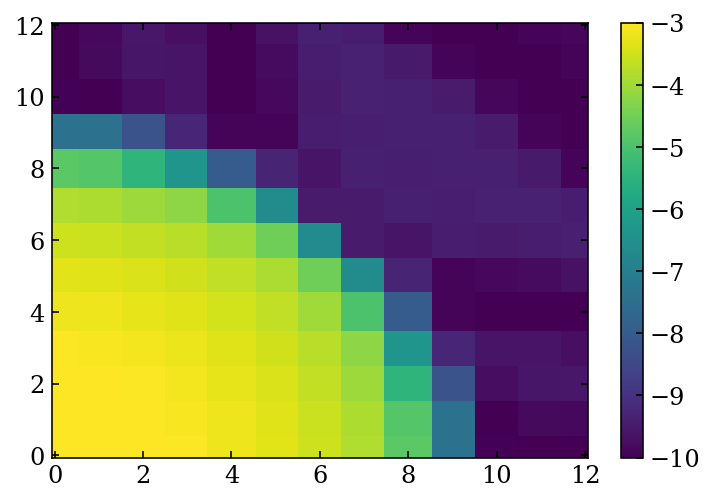

In [18]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[12,12])

#plot last of the evolution functions
rho_small = rho.read_on_grid(409600, small_grid)
rho_small_1 = rho_1.read_on_grid(409600, small_grid)
rho_small_2 = rho_2.read_on_grid(409600, small_grid)

#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

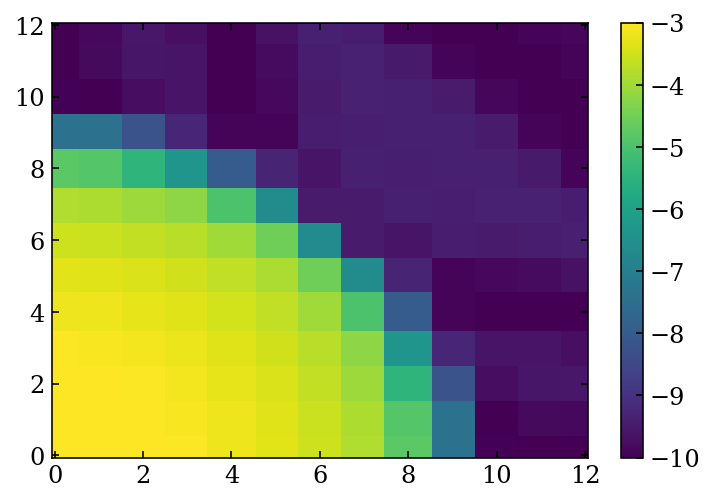

In [19]:
#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf_1 = plt.pcolormesh(*rho_small_1.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf_1)

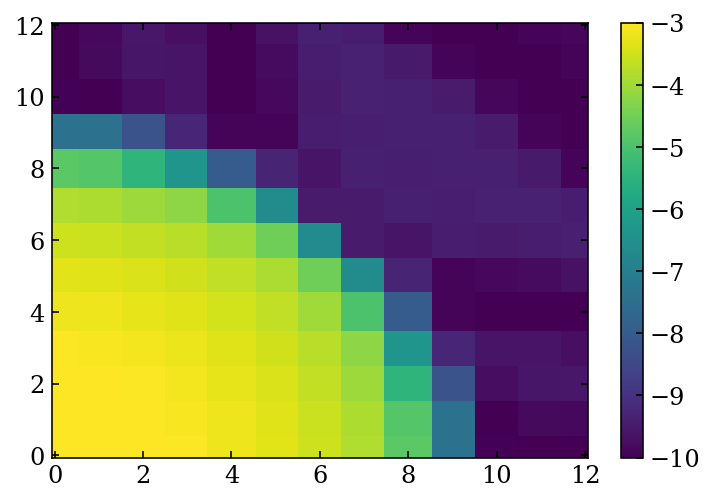

In [20]:
#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf_2 = plt.pcolormesh(*rho_small_2.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf_2)

In [21]:
#for i in rho.iterations:
#    print(i)
#    rho_small = rho.read_on_grid(i, small_grid)
#    cf2=plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
#    plt.savefig("frame_"+str(i)+".png")

### Evolution animation

Working out the resulting simulation by showing the evolution over time for a single resolution:

In [22]:
from IPython.display import HTML
import matplotlib.animation as animation
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

## Perturbation in pressure with three different resolutions

Here I am going to introduce some perturbation in the fluids equation ($k_par \neq 100$), then changing the resolution to see the outcome. 

Particularly I introduced the following changes in the .par file: 

| paramaters  | default  | selected |
|---|---|---|
| d$x$  | 2.0  | 2.0, 1.5, 1.0  |
| d$y$  | 2.0  | 2.0, 1.5, 1.0  |
| d$z$  | 2.0  | 2.0, 1.5, 1.0  |
| $\texttt{poly_k}$  | 100  | 98  |

Notice the three resolutions I used, that will be named accordingly in the following results. 

### Data import

In [34]:
sim_3 = sd.SimDir("./TOV_example_k_98_res_1/")
sim_4 = sd.SimDir("./TOV_example_k_98_res_1_5/")
sim_5 = sd.SimDir("./TOV_example_k_98_res_2/")

In [35]:
timeseries_3 = sim_3.timeseries
timeseries_4 = sim_4.timeseries
timeseries_5 = sim_5.timeseries

In [36]:
rho_max_3=timeseries_3.maximum.fields.rho
rho_max_4=timeseries_4.maximum.fields.rho
rho_max_5=timeseries_5.maximum.fields.rho

### Plots

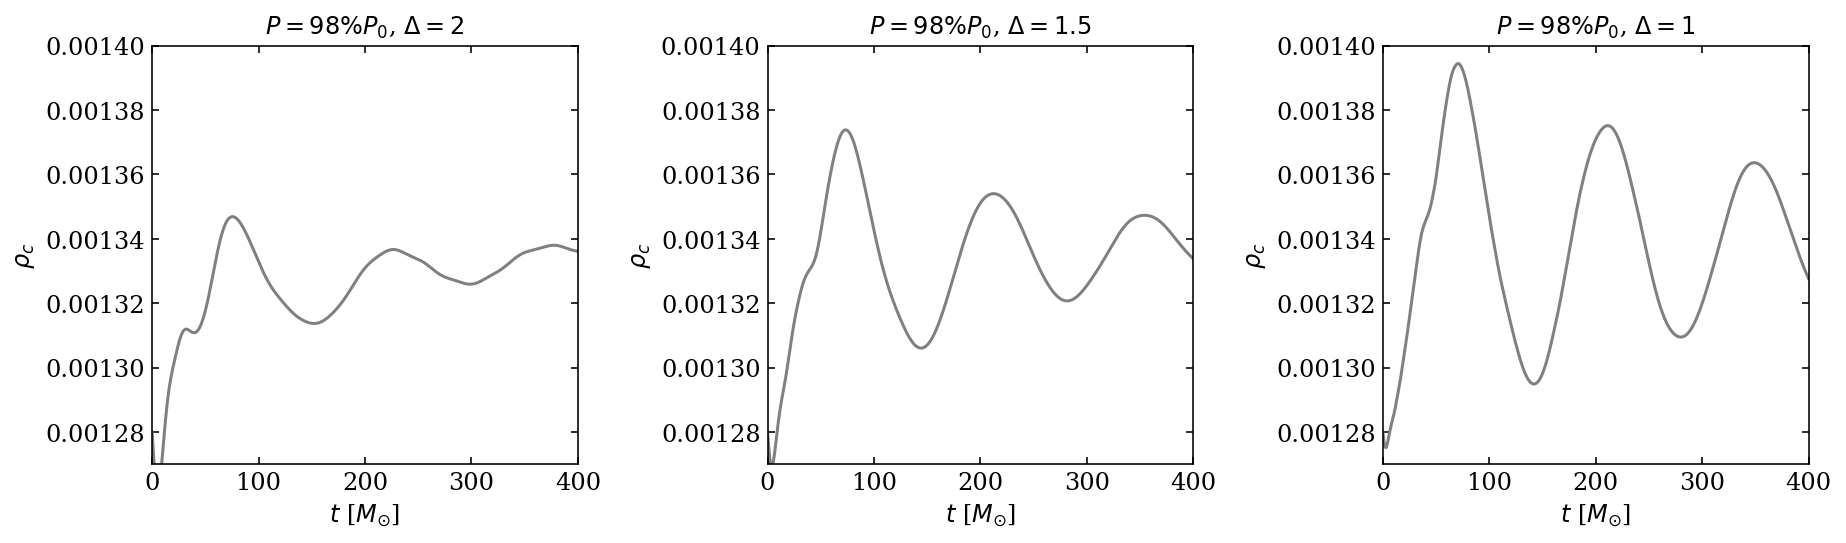

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

ax3.plot(rho_max_3, c='grey')
#ax3.set_title("maximum rest-mass density")
ax3.set_xlabel(r'$t$ [$M_{\odot}$]')
ax3.set_ylabel(r'$\rho_c$')
ax3.set_title(r'$P = 98\% P_0$, $\Delta = 1$')
ax3.set_ylim(0.00127, 0.0014)
#ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax2.plot(rho_max_4, c='grey')
#a2.set_title("maximum rest-mass density")
ax2.set_xlabel(r'$t$ [$M_{\odot}$]')
ax2.set_ylabel(r'$\rho_c$')
ax2.set_title(r'$P = 98\% P_0$, $\Delta = 1.5$')
ax2.set_ylim(0.00127, 0.0014)
#ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax1.plot(rho_max_5, c='grey')
#ax1.set_title("maximum rest-mass density")
ax1.set_xlabel(r'$t$ [$M_{\odot}$]')
ax1.set_ylabel(r'$\rho_c$')
ax1.set_title(r'$P = 98\% P_0$, $\Delta = 2$')
ax1.set_ylim(0.00127, 0.0014)
#ax3.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.tight_layout()
plt.savefig("./images/md_res_k.png")
plt.show()

We see that the main difference with the previous analysis is that here improving the resolution does not smooth out the oscillations we have in the rest mass density peak. This is because the origins of the oscillations are physical and not numerical, so a finer resolution only helps better visualize the result.